<a href="https://colab.research.google.com/github/eylulpelinkilic/Clash-Royale-DSA210-Project/blob/main/ML_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensionality Reduction via PCA

In [2]:
import pandas as pd

df = pd.read_excel("matches_50_players_prep (2).xlsx")

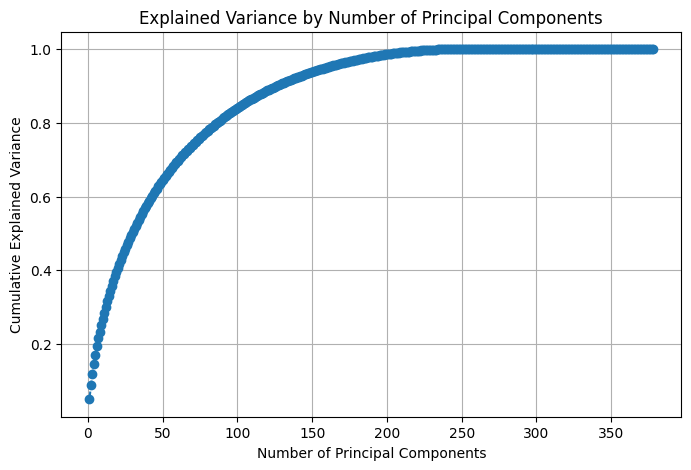

Number of components to explain 90% variance: 127


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Sayısal featureları seç (örn: 'win', 'team_deck' gibi categorical ya da hedef değişkenleri çıkar)
num_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Hedef değişken ya da modeli etkilemesini istemediğin kolonları çıkar
exclude_cols = ['win', 'some_other_target_or_id_columns']  # Gerekirse güncelle
features = [col for col in num_features if col not in exclude_cols]

# 2. Feature matrisini al
X = df[features]

# 3. Standartlaştır
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA uygula
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 5. Varyans oranlarını görselleştir
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

# 6. %90 varyans için bileşen sayısı
n_components = np.argmax(explained_var >= 0.90) + 1
print(f"Number of components to explain 90% variance: {n_components}")

# 7. Son PCA (boyut indirgeme)
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)

# X_reduced artık modelde kullanabileceğin indirgenmiş özellik matrisi


Regularized Logistic Regression (L1 & L2) (Without PCA)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Hedef değişken ve özellikleri hazırla
y = df['win']

# Örnek feature listesi (kendi feature listene göre güncelle)
feature_cols = [col for col in df.columns if col.startswith('team_n_')]

X = df[feature_cols]

# 2. Özellikleri ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Logistic Regression modeli (L2 regularization - default)
model_l2 = LogisticRegression(penalty='l2', max_iter=1000, solver='liblinear')
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print("L2 Regularized Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print(classification_report(y_test, y_pred_l2))

# 5. Logistic Regression modeli (L1 regularization)
model_l1 = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
print("L1 Regularized Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l1))


L2 Regularized Logistic Regression
Accuracy: 0.5258620689655172
              precision    recall  f1-score   support

           0       0.36      0.22      0.27       187
           1       0.58      0.73      0.65       277

    accuracy                           0.53       464
   macro avg       0.47      0.48      0.46       464
weighted avg       0.49      0.53      0.50       464

L1 Regularized Logistic Regression
Accuracy: 0.5280172413793104
              precision    recall  f1-score   support

           0       0.36      0.22      0.27       187
           1       0.58      0.74      0.65       277

    accuracy                           0.53       464
   macro avg       0.47      0.48      0.46       464
weighted avg       0.49      0.53      0.50       464



Regularized Logistic Regression (L1 & L2) (With PCA)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Hedef değişken
y = df['win']

# PCA ile indirgenmiş özellik matrisi
X = X_reduced  # Zaten ölçeklenmiş ve PCA uygulanmış

# Eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L2 regularized logistic regression modeli oluştur ve eğit
model = LogisticRegression(penalty='l2', max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans ölçümü
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9870689655172413
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       187
           1       0.98      1.00      0.99       277

    accuracy                           0.99       464
   macro avg       0.99      0.98      0.99       464
weighted avg       0.99      0.99      0.99       464



Random Forest (Without PCA)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Hedef değişken
y = df['win']

# Özellik seçimi (örneğin team_n_ ile başlayanlar)
feature_cols = [col for col in df.columns if col.startswith('team_n_')]
X = df[feature_cols]

# Özellikleri ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Random Forest modeli oluştur
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğit
rf.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = rf.predict(X_test)

# Performansı değerlendir
print("Random Forest Classifier Performance (Without PCA)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Classifier Performance (Without PCA)
Accuracy: 0.5969827586206896
              precision    recall  f1-score   support

           0       0.50      0.33      0.39       187
           1       0.63      0.78      0.70       277

    accuracy                           0.60       464
   macro avg       0.57      0.55      0.55       464
weighted avg       0.58      0.60      0.58       464



Random Forest (With PCA)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Hedef değişken
y = df['win']

# PCA ile indirgenmiş özellik matrisi
X = X_reduced

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest modeli oluştur
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğit
rf.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = rf.predict(X_test)

# Performansı değerlendir
print("Random Forest Classifier Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Classifier Performance
Accuracy: 0.8232758620689655
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       187
           1       0.80      0.94      0.86       277

    accuracy                           0.82       464
   macro avg       0.84      0.80      0.81       464
weighted avg       0.83      0.82      0.82       464



Gradient Boosting (Without PCA)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Hedef değişken
y = df['win']

# Özellikler (örneğin team_n_ ile başlayanlar)
feature_cols = [col for col in df.columns if col.startswith('team_n_')]
X = df[feature_cols]

# Özellikleri ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# GBM modeli oluştur
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Modeli eğit
gbm.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = gbm.predict(X_test)

# Performansı değerlendir
print("Gradient Boosting Classifier Performance (Without PCA)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier Performance (Without PCA)
Accuracy: 0.5905172413793104
              precision    recall  f1-score   support

           0       0.49      0.28      0.35       187
           1       0.62      0.80      0.70       277

    accuracy                           0.59       464
   macro avg       0.55      0.54      0.53       464
weighted avg       0.57      0.59      0.56       464



Gradient Boosting (With PCA)

In [11]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Hedef değişken
y = df['win']

# Özellikler (örneğin team_n_ ile başlayanlar)
feature_cols = [col for col in df.columns if col.startswith('team_n_')]
X = df[feature_cols]

# Özellikleri ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA uygulama - bileşen sayısını belirle (örnek: varyansın %90'ını açıklayan bileşenler)
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# GBM modeli oluştur
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Modeli eğit
gbm.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = gbm.predict(X_test)

# Performansı değerlendir
print("Gradient Boosting Classifier Performance (With PCA)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier Performance (With PCA)
Accuracy: 0.5818965517241379
              precision    recall  f1-score   support

           0       0.47      0.26      0.33       187
           1       0.61      0.80      0.70       277

    accuracy                           0.58       464
   macro avg       0.54      0.53      0.51       464
weighted avg       0.55      0.58      0.55       464

